In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema
from mpl_toolkits.mplot3d import axes3d

In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

In [3]:
pd.set_option("display.precision",16)

# MOL for (1+1) dimensional system of equation

In [4]:
# notes on amplitudes
# A = 1.94 diverges with dx = 0.00625[3] at t = 0.5075
# A = 1.935 diverges with dx = 0.003125[3], not untill t = 0.53375
# A = 1.9345 diverges with dx = 0.00625[3], not untill t = 0.54
# A = 1.934 doesn't diverge with dx = 0.00625[3]
# A = 1.933 doesn't diverge with dx = 0.0125[3] 
#amplitude_vector = [1.924432, 1.925904, 1.927171, 1.928262, 1.929200, 1.930008, 1.930703, 1.931302, 1.931817, 1.932260, 1.932642]

amplitude_vector=[]# time
range_time = 0.6
number_steps= 120
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step/2,len_step)

epsilon = [0.05]
dx = 0.0125

number_of_proc = 4

model = "hyperboloidal_model4"
data = [0]
names = names_generator(data,epsilon,amplitude_vector,number_of_proc,model,dx,number_steps,range_time)

print(len(names)/4)


11.0


In [5]:
big_DF = []

In [6]:
%%time
h1 = float(dx)
h2 = h1/2
h3 = h2/2
dmin = 0
dmax = 5
domain_lenght = dmax-dmin
gl = 2
gr = 2
for p in range(int(len(names)/4)):
    print("----->",p)
    big_DF=big_DF+read_parallel_data(dmax,dmin,gl,gr,domain_lenght,h1,h2,h3,number_of_proc,number_steps,names[p*4:p*4+4])
print(len(big_DF))

-----> 0
[405, 805, 1605]
99 102 105
run:0 ->./data0/processor_0_ampl_1.924432_eps0.050000_dx_0.012500steps120last_time0.600000.csv added
number of runs: 4
-----> 1
[405, 805, 1605]
99 102 105
run:0 ->./data0/processor_0_ampl_1.925904_eps0.050000_dx_0.012500steps120last_time0.600000.csv added
number of runs: 4
-----> 2
[405, 805, 1605]
99 102 105
run:0 ->./data0/processor_0_ampl_1.927171_eps0.050000_dx_0.012500steps120last_time0.600000.csv added
number of runs: 4
-----> 3
[405, 805, 1605]
99 102 105
run:0 ->./data0/processor_0_ampl_1.928262_eps0.050000_dx_0.012500steps120last_time0.600000.csv added
number of runs: 4
-----> 4
[405, 805, 1605]
99 102 105
run:0 ->./data0/processor_0_ampl_1.929200_eps0.050000_dx_0.012500steps120last_time0.600000.csv added
number of runs: 4
-----> 5
[405, 805, 1605]
99 102 105
run:0 ->./data0/processor_0_ampl_1.930008_eps0.050000_dx_0.012500steps120last_time0.600000.csv added
number of runs: 4
-----> 6
[405, 805, 1605]
99 102 105
run:0 ->./data0/processor_0

In [371]:
def hyperbolic_chi_m3_charvar_solution_Psi2Minus(r,t,a,B,C,ds,s):
    A = a
    R = r/(1-r**2/s**2)
    T = t+R-r
    Chi = (1+R**2)**0.5
    J = R-T
    K = np.exp(4*ds**2*R*T)
    L = (R+T)
    M = R**2+T**2
    N = B*A*(np.exp(-ds**2*J**2)*J+np.exp(-ds**2*L**2)*L)/2/R
    P = np.log(1+N)/C
    Q = np.log(1+(A*np.exp(-ds**2*J**2)*J+A*np.exp(-ds**2*L**2)*L)/2/R)/C
    S = J*K+L
    V = np.exp(ds**2*J**2)
    U = np.exp(2*ds**2*M)
    return(-A*V*np.sin(Q)*(L+K*((-1+4*ds**2*J**2)*R-T))*Chi/(R*(A*S*V+2*U*R)))

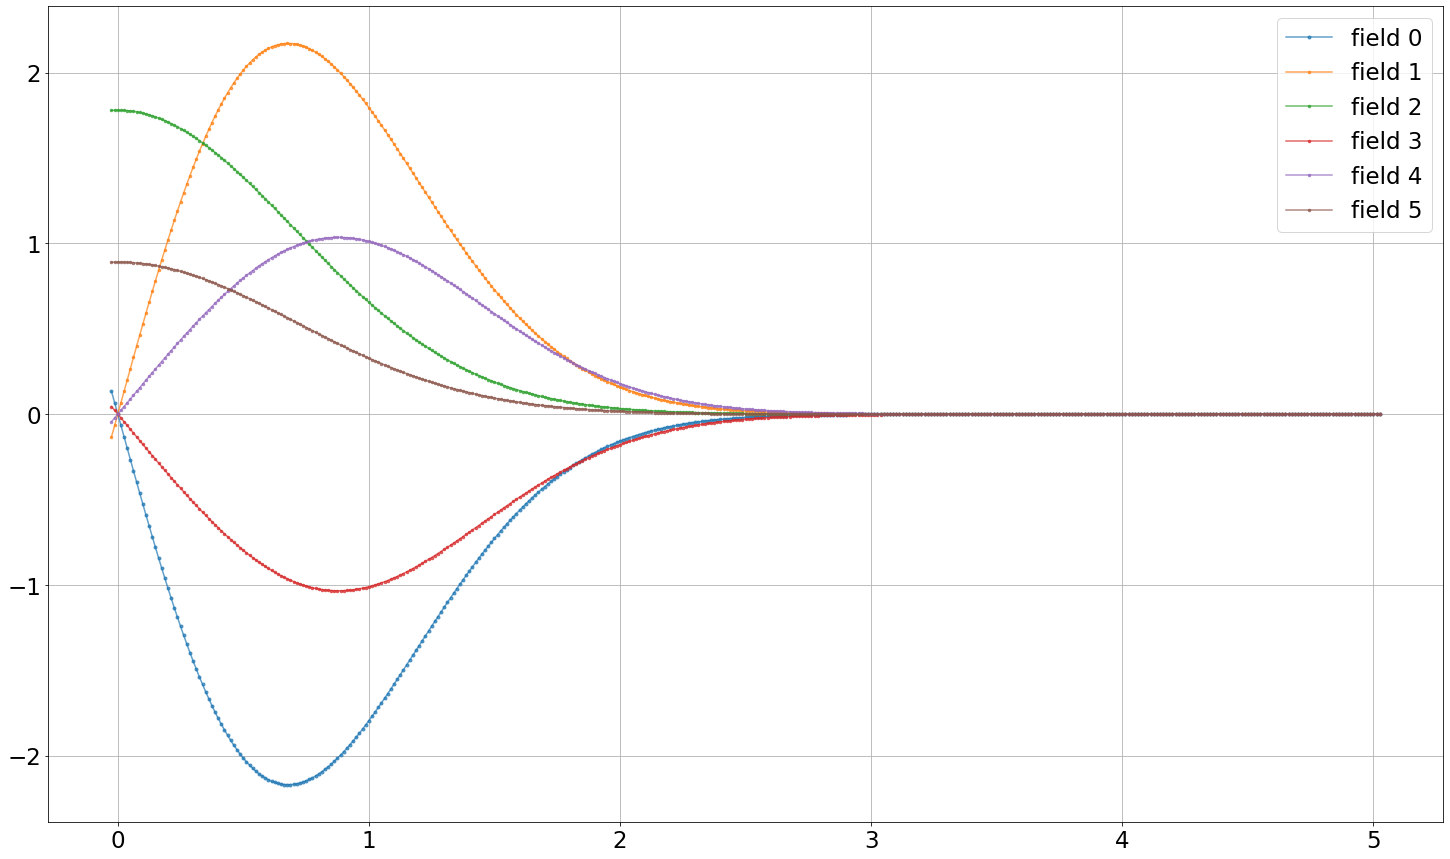

In [372]:
# plot of the initial conditions
for n in range(0,1):
    for i in range(1,2):
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],'.-',alpha=0.7,label="field 0")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],'.-',alpha=0.7,markersize=5,label="field 1")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],'.-',alpha=0.7,markersize=5,label="field 2")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field3'],'.-',alpha=0.7,markersize=5,label="field 3")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field4'],'.-',alpha=0.7,markersize=5,label="field 4")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field5'],'.-',alpha=0.7,markersize=5,label="field 5")


plt.legend()
plt.grid()
#plt.xlim([-1, 5.5])
#plt.ylim([-3, 3])

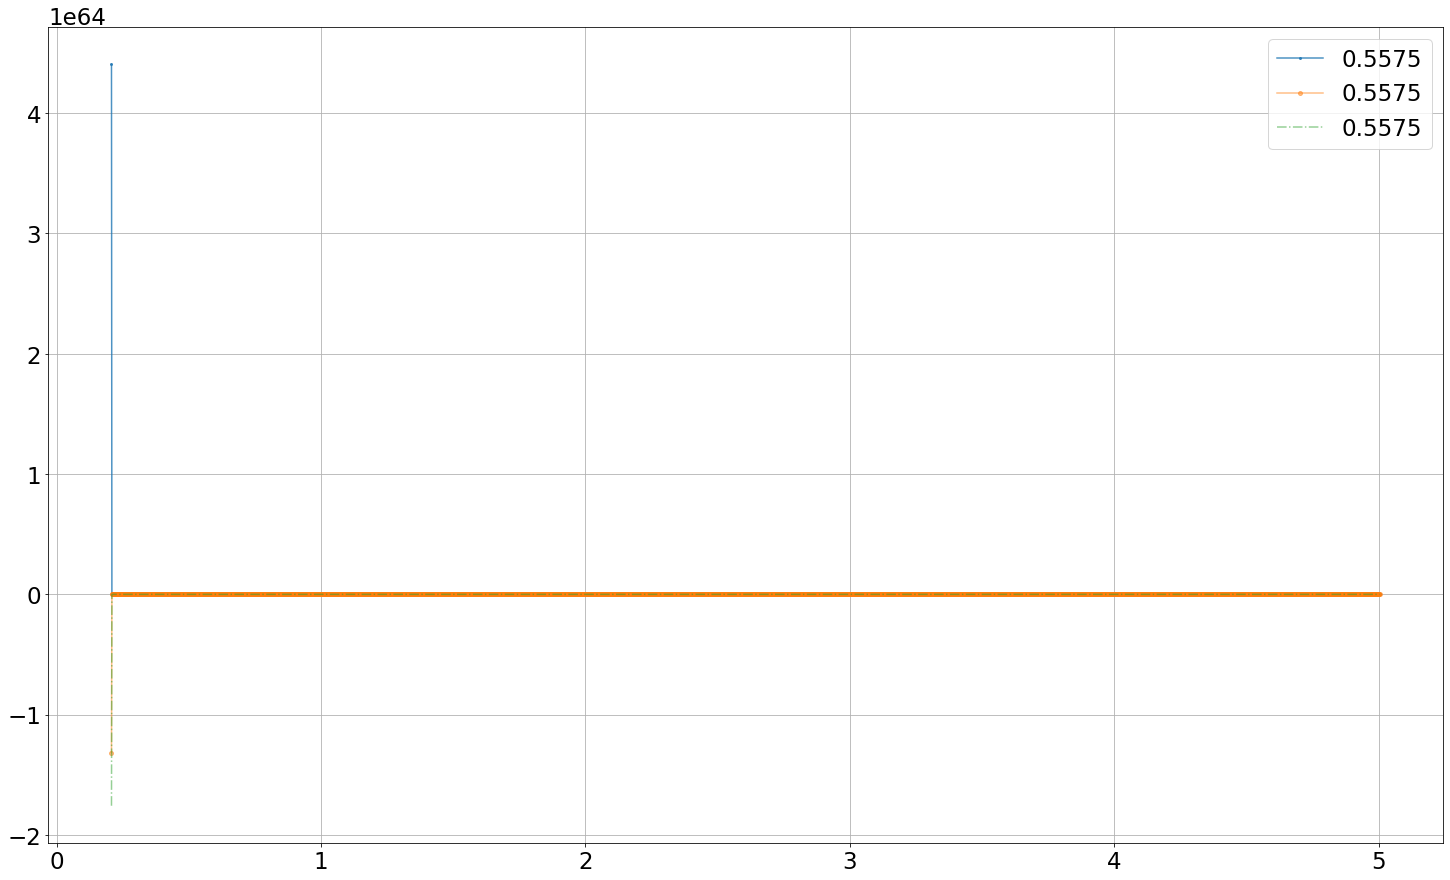

In [241]:
for n in [0]:
    for i in range(2,3):        
        for j in range(223,224):
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],'.-',alpha=0.8,markersize=4,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],'.-',alpha=0.5,markersize=4,label=epsilon[n])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],'.-',alpha=0.75,markersize=4,label=times[j])
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field3'],'.-',alpha=0.5,markersize=8,label=times[j])
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field4'],'-.',alpha=0.5,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field5'],alpha=0.8,markersize=8,label="5")
            #plt.plot(big_DF[n][i][j]['x'],model3_gaussian_solution(big_DF[n][i][j]['x'],times[j],float(amplitude_vector[0])),markersize=5,alpha=0.7,label="teo,time:"+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],spherical_we_solution(big_DF[n][i][j]['x'],times[j],1,1))
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_Psi(big_DF[n][i][j]['x'],times[j],3,1,0.5,dmax),alpha=0.8,label='theoretical Psi')
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],3,1,1,dmax),alpha=0.8,label='theoretical PsiPlus 5')            
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],3,1,0.5,dmax),alpha=0.8,label='theoretical PsiPlus 3')
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiMinus(big_DF[n][i][j]['x'],times[j],amplitude_vector[n],1,1,dmax),alpha=0.8,label='theoretical PsiMinus')
            #plt.plot(big_DF[n][i][j]['x'], hyperbolic_chi_m3_charvar_solution_Psi2Plus(big_DF[n][i][j]['x'],times[j],1,1,0.5,1,dmax),alpha=0.8,label='theoretical PsiMinus')
            #plt.plot(big_DF[n][i][j]['x'], hyperbolic_chi_m3_charvar_solution_Psi2Minus(big_DF[n][i][j]['x'],times[j],1,1,0.5,1,dmax),alpha=0.8,label='theoretical PsiMinus')

            #plt.plot(big_DF[n][i][j]['x'],m1_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],1,1),alpha=0.8,label='theoretical Psi')
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_we_solution(big_DF[n][i][j]['x'],times[j],1,1/5,dmax),'+',alpha=0.5,label='theoretical')
            #plt.plot(big_DF[n][i][j]['x'],initial_test(big_DF[n][i][j]['x'],times[j],1,1./5.,5))
            
plt.grid()
#plt.xlim([0,1])
#plt.ylim([ -5,5] )
#plt.yscale('log')
plt.legend()


In [9]:
scri_signal = []
field = 'field4'
points = [2]
for n in [9]:
    for i in range(2,3):
        for point in points:
            scri_signal_point = []
            for j in range(0,len(times)-1):       
                scri_signal_point.append(np.array(big_DF[n][i][j][field])[point])
            scri_signal.append(scri_signal_point)

0 2


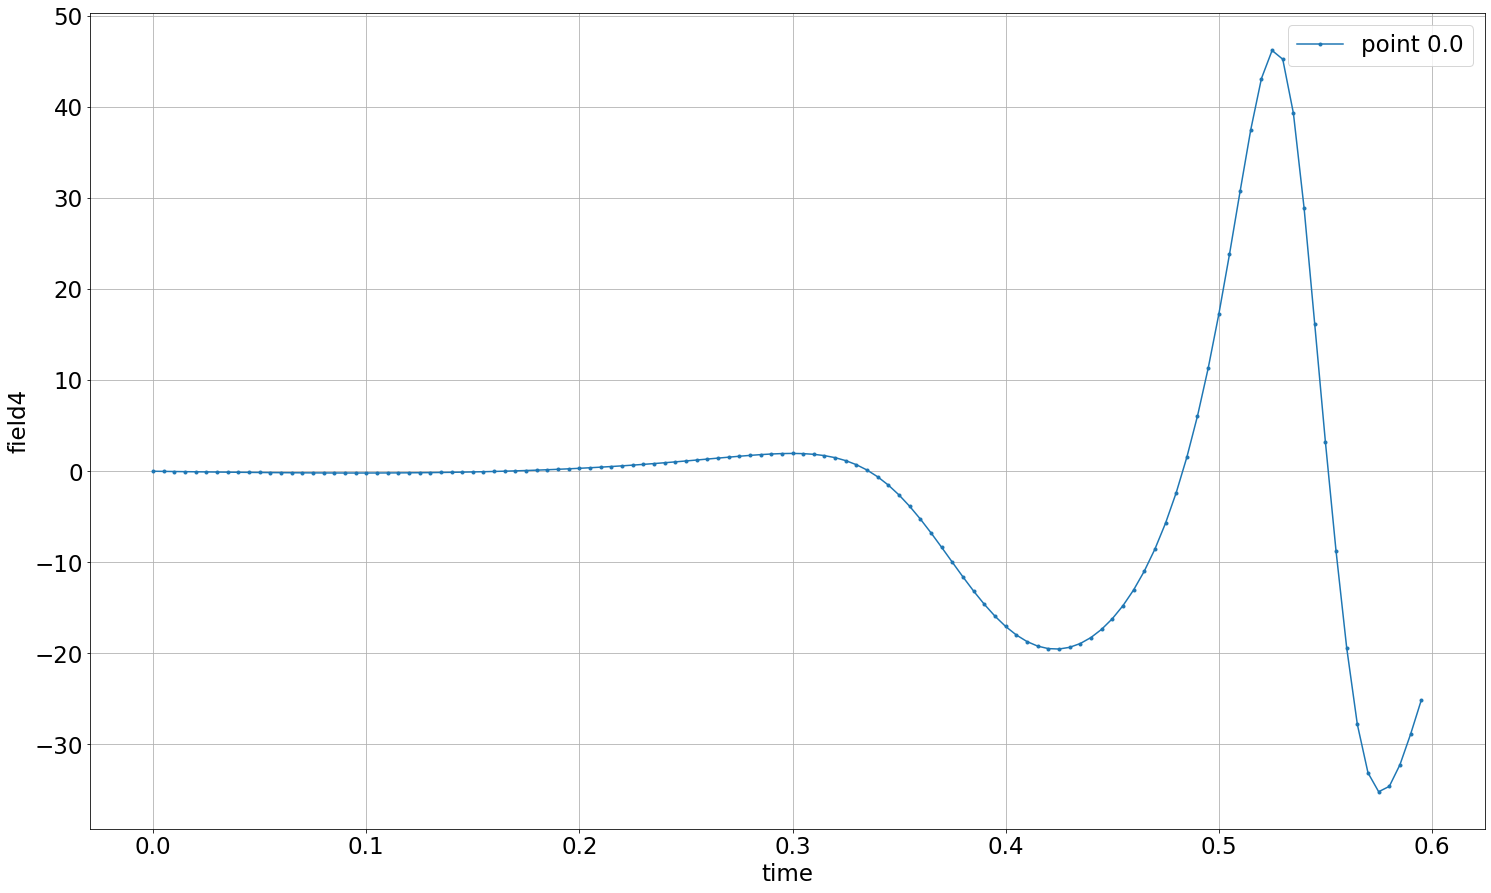

In [10]:
for n in [9]:
    for i in range(2,3):
        for k,p in enumerate(points):
            print(k,p)    
            plt.plot(times[0:-1],scri_signal[k],'.-',label="point "+str(np.array(big_DF[n][i][j]['x'])[p]))
plt.xlabel("time")
plt.ylabel(field)
plt.grid()
plt.legend()

## Convergence test and out put

### Self convergence test

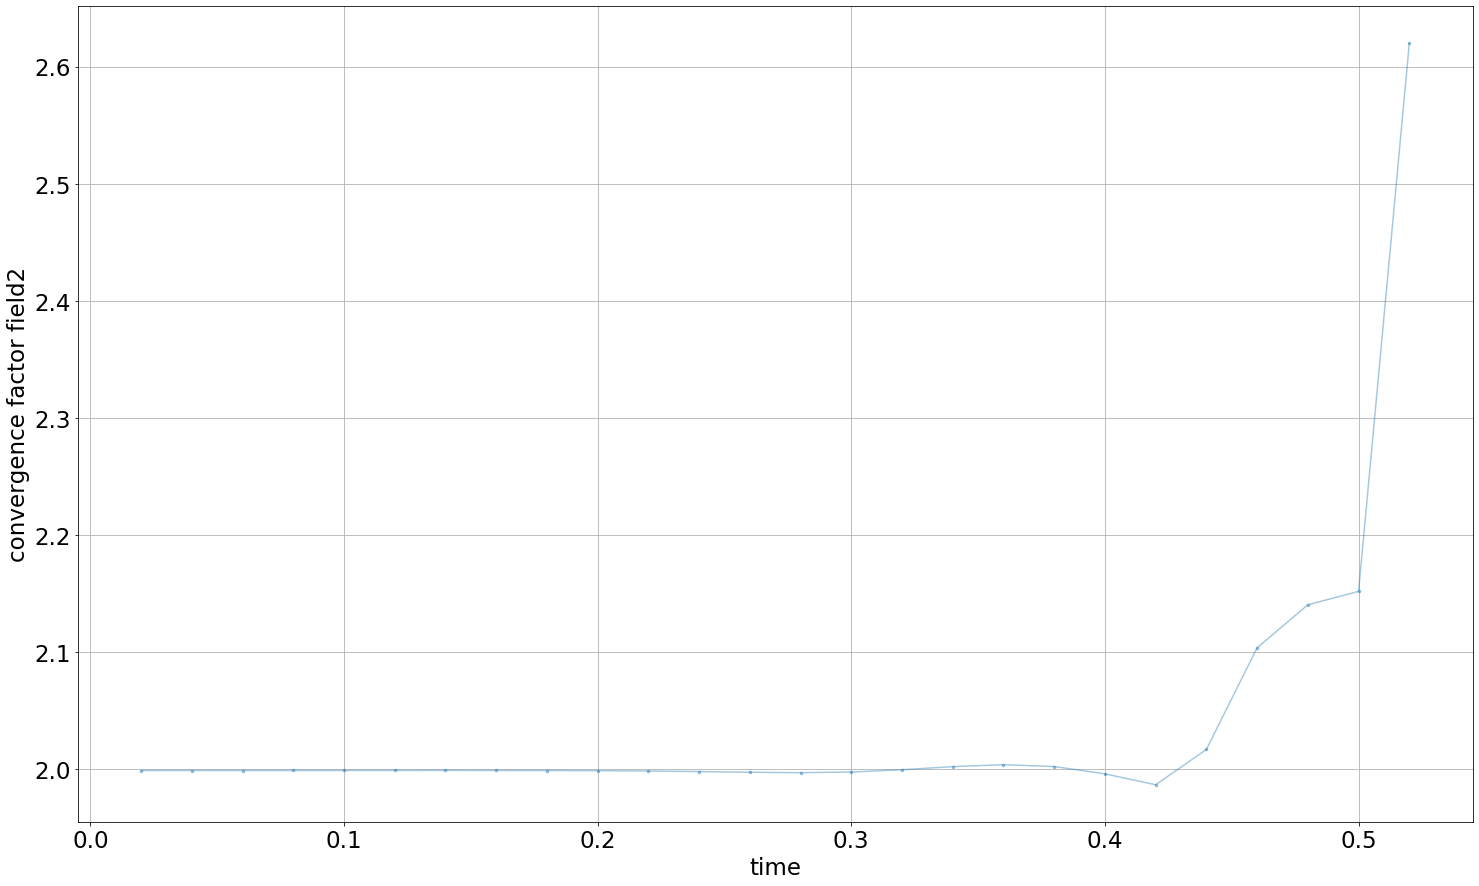

In [204]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
field = "field2"

for n in [0]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,field) )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=5,alpha=0.4)
#plt.xlim(0,30)
#plt.ylim(1.5,2.5)
plt.xlabel('time')
plt.ylabel('convergence factor '+ field)
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
#plt.legend()

### Pointwise convergence
The function self_conv_test compute a difference vector between the resolution 0 and 1, and 4 times a difference vector between resolution 1 and 2. The two vector should theoretically coincide.

In [56]:
n_ind = 0
field = "field0"
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr,field))
    #plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
#plt.ylabel('pointwise convergence factor')
#plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

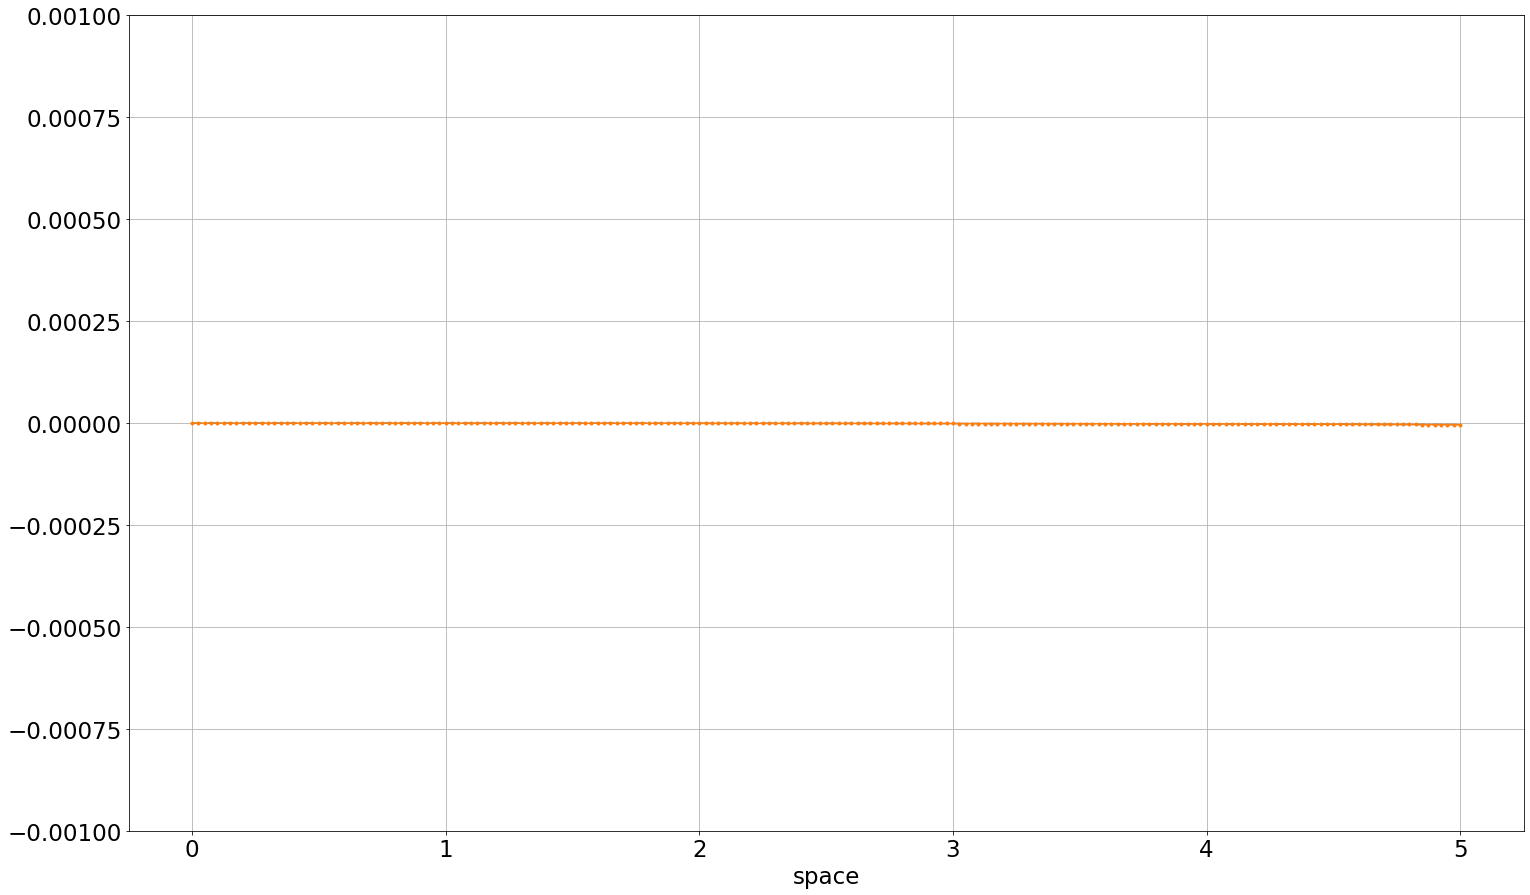

In [57]:
ylim_inf = -0.001
ylim_sup = 0.001
plot_pw_convergence(big_DF,gl,gr,self_conv_test_vect_pw,model,data,field,epsilon,n_ind,dx,number_steps,ylim_inf,ylim_sup)

## Evolutions' videos of the functions

### Animation of a singular field

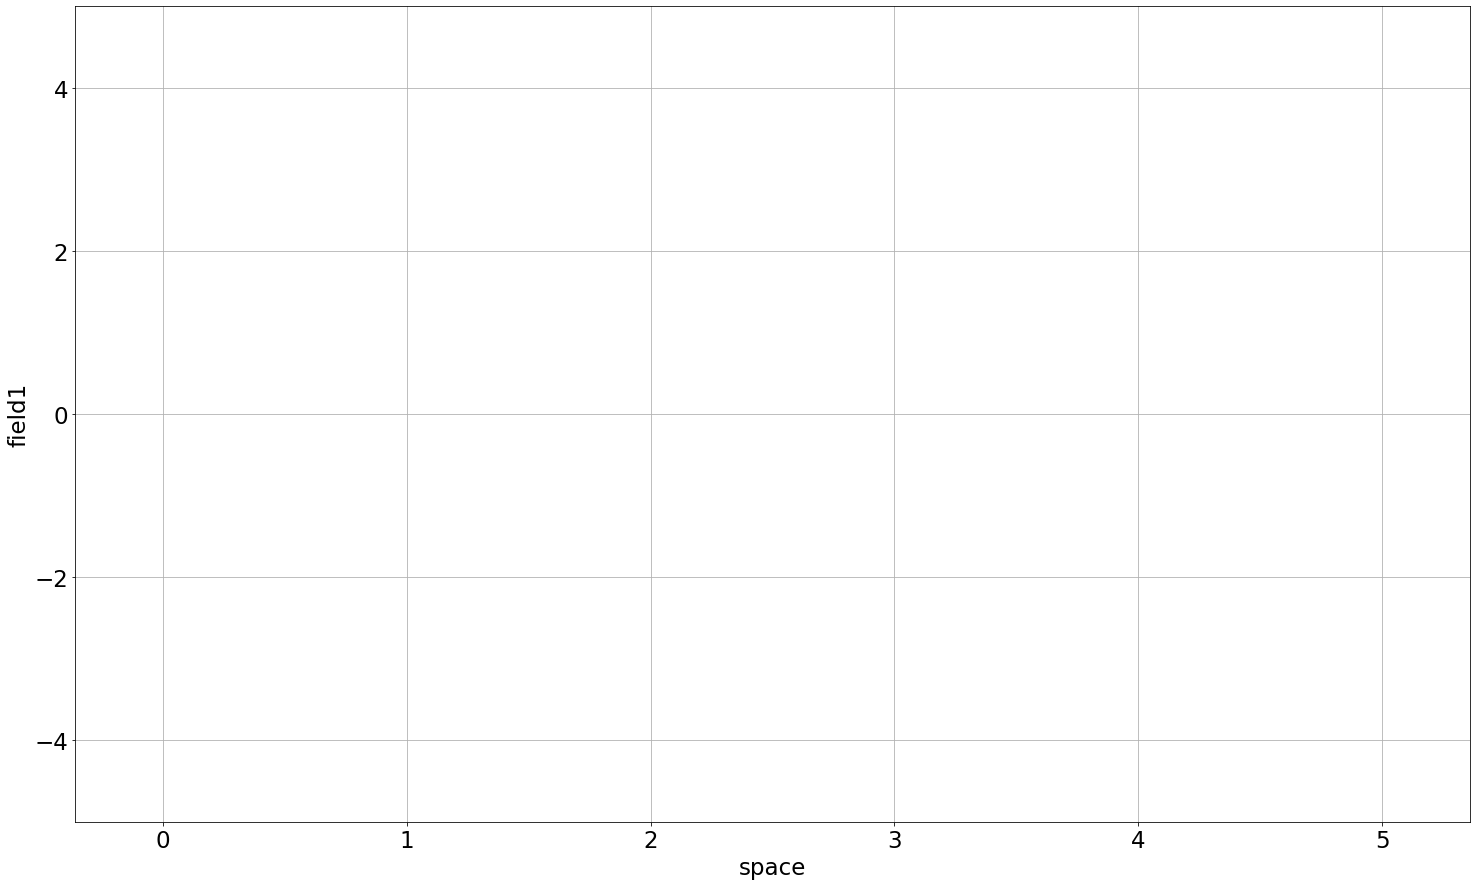

In [153]:
ylim_inf = -5
ylim_sup = 5
field_number = 1
h_ind = 0
big_DF_ind = 0
animate_one_field(field_number,h_ind,big_DF_ind,model,data,big_DF,ylim_inf,ylim_sup,number_steps)

### Animation of multiple fields

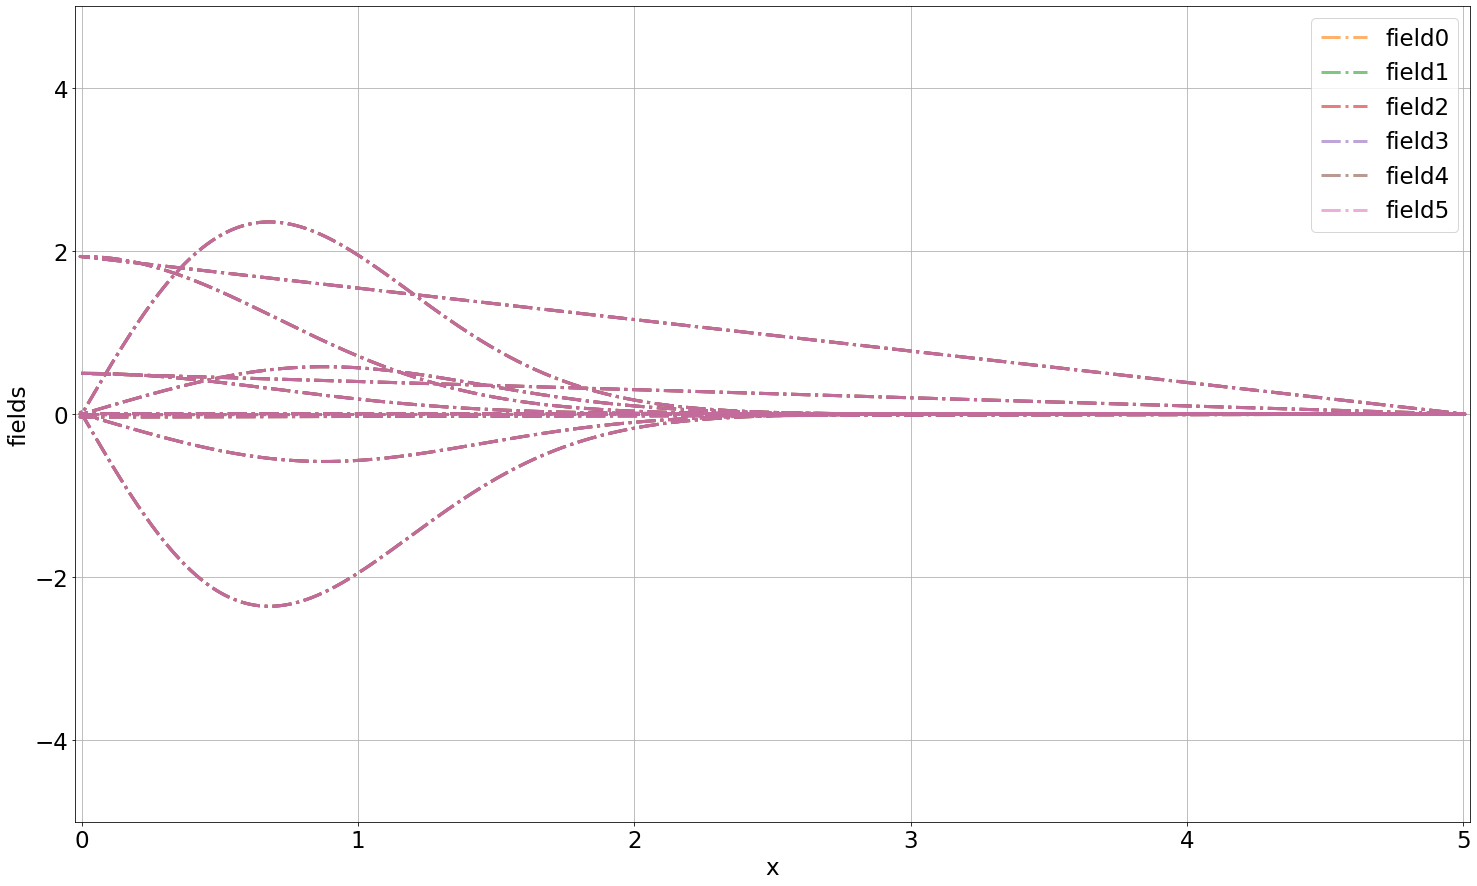

In [111]:
fields_to_print = ["field0","field1","field2","field3","field4","field5"]
ylim_inf = -5
ylim_sup = 5
h_ind = 2
big_DF_ind = 0
animate_multiple_fields(big_DF,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,ylim_inf,ylim_sup,number_steps,domain_lenght)

### Theoretical comparisons

In [29]:
def theoretical_comparison(big_DF,theoretical_function,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,number_steps,domain_lenght,ylim_inf,ylim_sup,times,amplitude_vector,ds,C):
    data_name = "./data"+str(data[0])+"/theoretical_comparison.mp4"
    fig = plt.figure()
    ax1 = plt.axes(ylim=(ylim_inf,ylim_sup),xlim=(-float(dx)*gl,domain_lenght+float(dx)*gr))
    line, = ax1.plot([], [])
    plt.xlabel('x')
    plt.ylabel('fields')
    plotlays = [fields_to_print]
    lines = []
    for index in (fields_to_print[0:-1]):
        lobj = ax1.plot([],[],'+',lw=3,alpha=0.6,label=index)[0]
        lines.append(lobj)
    lobj = ax1.plot([],[],lw=3,alpha=0.6,label="theoretical solution")[0]
    lines.append(lobj)

    x = []
    y = []
    for i in (fields_to_print[0:-1]):
        x.append([big_DF[big_DF_ind][h_ind][0]['x']]),
        y.append([ big_DF[big_DF_ind][h_ind][0][i]])

    x.append([big_DF[0][h_ind][0]['x']]),
    y.append([theoretical_function(big_DF[big_DF_ind][h_ind][0]['x'],times[0],float(amplitude_vector[big_DF_ind]),1,1,ds,domain_lenght)])
    #y.append([hyperbolic_chi_we_solution(big_DF[big_DF_ind][h_ind][0]['x'],times[0],1,0.5,domain_lenght)])

    def init():
        for line in lines:
            line.set_data(x,y)      
            #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
        return lines





    def animate(i):
        for n,j in enumerate (fields_to_print[0:-1]):
            x[n] = big_DF[big_DF_ind][h_ind][0]['x']
            y[n] = big_DF[big_DF_ind][h_ind][i][j]
        x[1] = big_DF[big_DF_ind][h_ind][0]['x']
        #y[1] = theoretical_function(big_DF[big_DF_ind][h_ind][0]['x'],times[i],float(amplitude_vector[big_DF_ind]))
        y[1] = theoretical_function(big_DF[big_DF_ind][h_ind][0]['x'],times[i],float(amplitude_vector[big_DF_ind]),1,1,ds,domain_lenght)

        xlist = x
        ylist = y

        #for index in range(0,1):
        for lnum,line in enumerate(lines):
            line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

        return lines

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=int(number_steps-1), interval=50, blit=True)
    plt.legend()
    plt.grid()
    plt.show()
    anim.save(data_name)

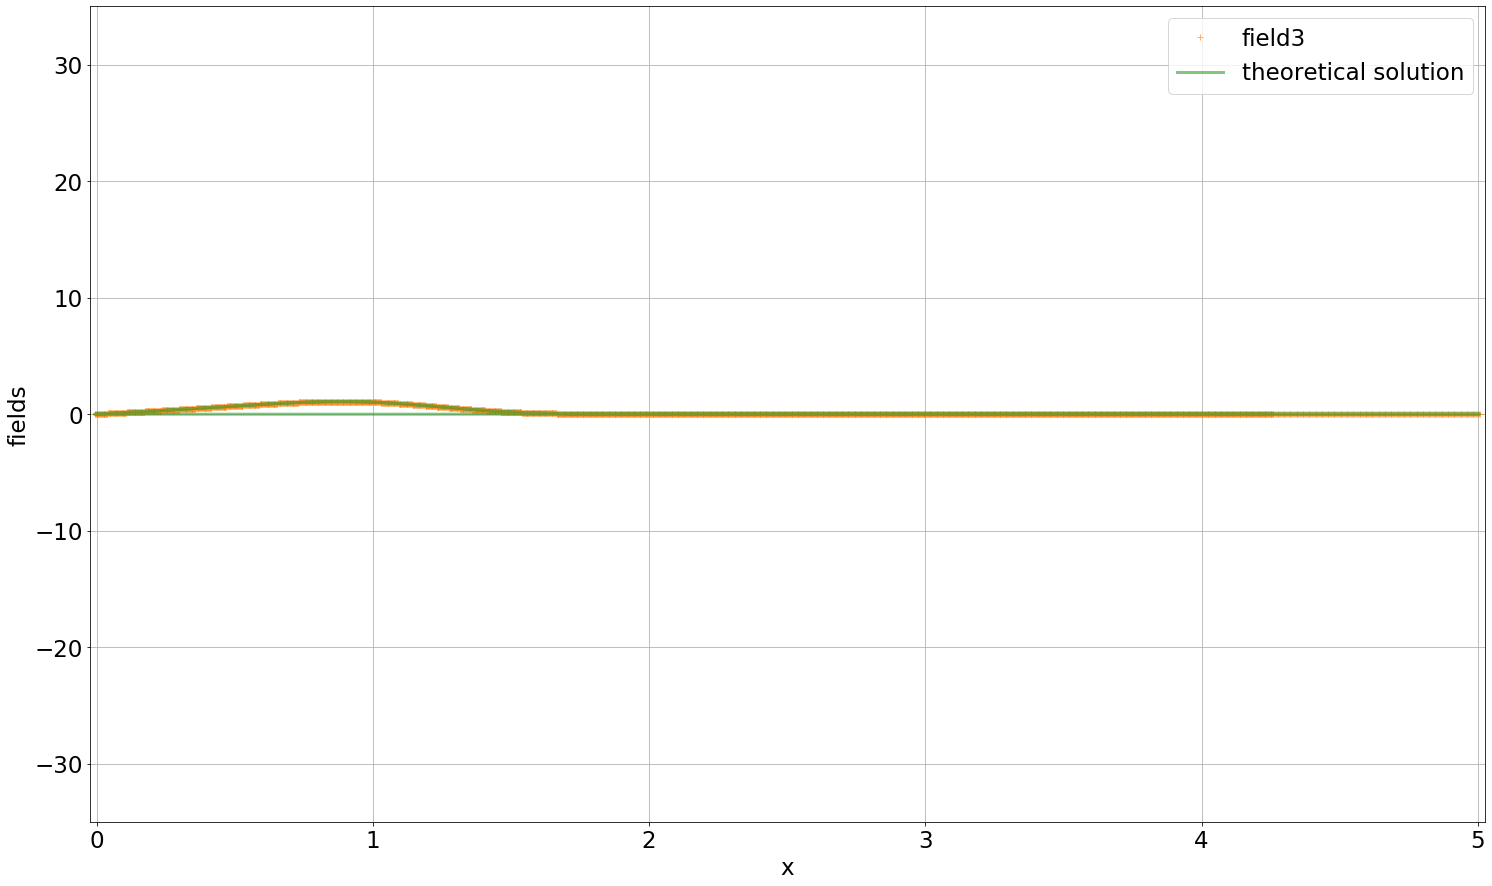

/home/giulio/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
fields_to_print = ["field3","theoretical"]
h_ind = 2
big_DF_ind = 0
ylim_inf = -35
ylim_sup = 35
ds = 1
C=1
theoretical_comparison(big_DF,hyperbolic_chi_m3_charvar_solution_Psi2Plus,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,number_steps,domain_lenght,ylim_inf,ylim_sup,times,amplitude_vector,ds,C)

## Plot of the power law scaling for the CSS and DSS models

In [242]:
# critical time = 0.5075?
ds = 1
Ac = 1.935
tc = (3/2)**0.5/ds
print ("critical amplitude Ac =",Ac," critical time tc =",tc)

critical amplitude Ac = 1.935  critical time tc = 1.224744871391589


In [258]:
# we compute the maximums over all times for each run (they have different initial amplitude)
maximums = runs_maximums_vector(big_DF,2,'field0')
amplitudes_vector = []
for n in range(int(len(names)/4)):
    amplitudes_vector.append(float(names[4*n][25:33]))
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)):
    amplitudes_vector[i] = Ac - amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
print(len(amplitudes_for_fit))
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

amplitudes: [1.924432, 1.925904, 1.927171, 1.928262, 1.9292, 1.930008, 1.930703, 1.931302, 1.931817, 1.93226, 1.932642]
11
maximum [20.438147343774478, 22.181762729914176, 23.858785754503153, 25.447094565921404, 26.92521276123339, 28.281738707752503, 29.50581968921126, 30.59634022874402, 31.55206095167725, 32.37926887061884, 33.10379247233683]
intercept: 1.6309977701147313 angular coefficient [0.31654043]


Text(0, 0.5, 'maximum PI overall times')

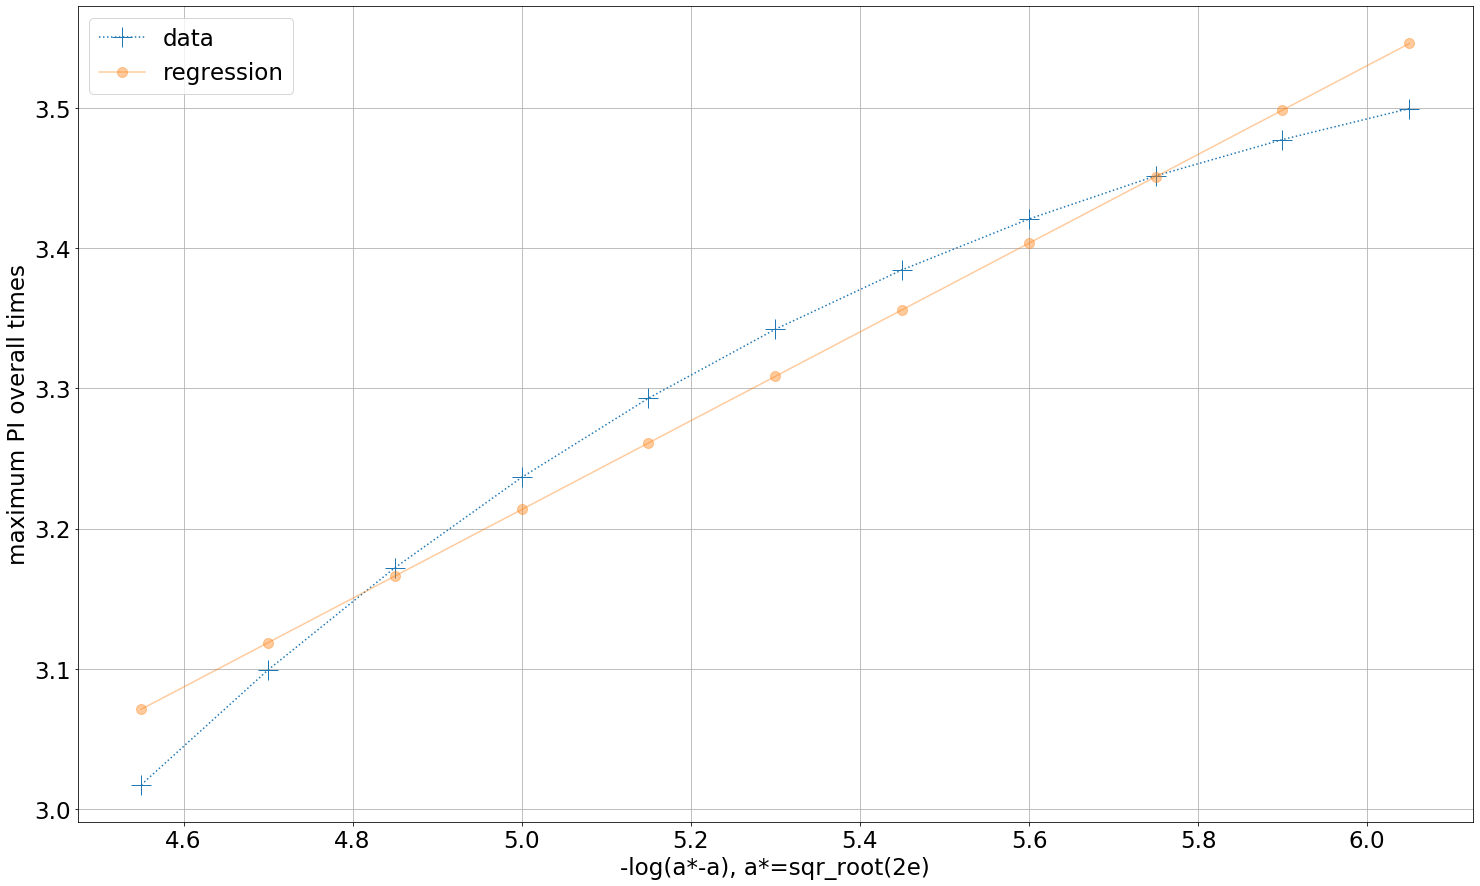

In [259]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')
#RESULTS: intercept: 0.796531249552912 angular coefficient [0.49825299]

### Production of the amplitudes to analyze

In [260]:
amplitudes_vector_creator(6.15,8.5,Ac,0.15)


array([1.93286652, 1.9331637 , 1.93341948, 1.93363963, 1.93382912,
       1.93399221, 1.93413259, 1.93425341, 1.93435741, 1.93444692,
       1.93452396, 1.93459027, 1.93464734, 1.93469646, 1.93473874,
       1.93477513])

In [14]:
 2.236327 needs  0.00625,  

9.326575926388497

In [7]:
def temporal_vector(fields,times,big_DF,h_ind,big_DF_ind):
    temporal_field = []
    for field in fields:
        temporal_field_i = []
        for j in range(len(times)-1):
            temporal_field_i.append(big_DF[big_DF_ind][h_ind][j][field])
        temporal_field.append(temporal_field_i)
    return(temporal_field)

In [8]:
h_ind = 2
big_DF_ind = 0
fields = ["field0","field1","field2","field3","field4","field5"]
temporal_field = temporal_vector(fields,times,big_DF,h_ind,big_DF_ind)

Text(0.5, 1.0, 'field4')

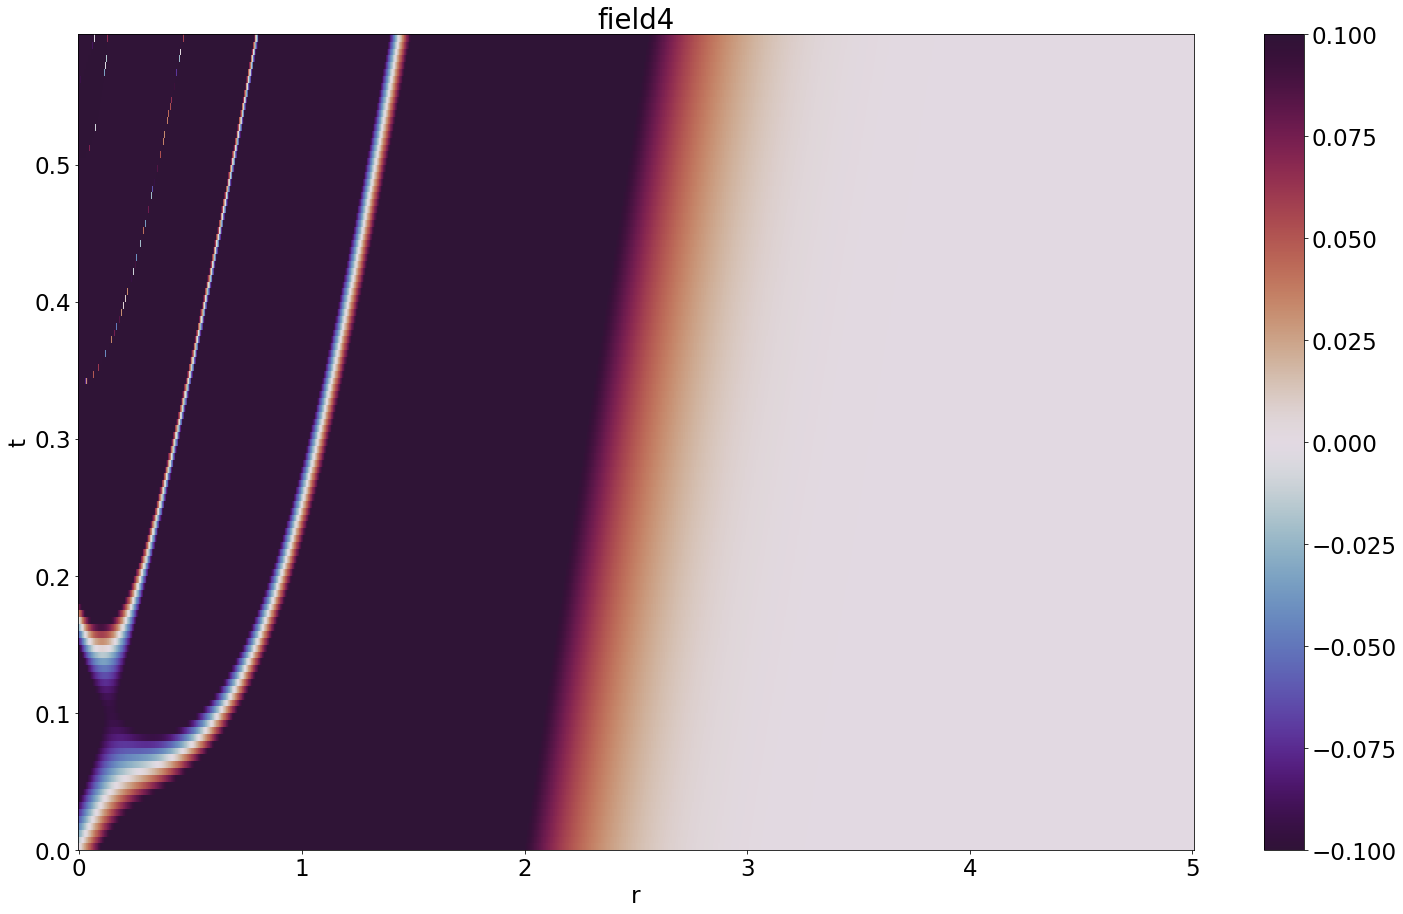

In [10]:
field_ind = 4
y = times[:-1]
x = big_DF[big_DF_ind][h_ind][0]['x']
plt.pcolormesh(x,y,temporal_field[field_ind],vmin=-0.1,vmax=0.1,cmap='twilight_shifted')
plt.colorbar( orientation="vertical")
#plt.ylim([0,8])
plt.xlabel('r')
plt.ylabel('t')
plt.title(fields[field_ind])

In [229]:
def m3_constraint(temporal_field):
    times_norm = []
    for t in range(len(temporal_field[0])):
        times_norm.append([])
        for j in range(len(temporal_field[0][0])):
            times_norm[t].append(temporal_field[2][t][j]**2+temporal_field[5][t][j]**2)
    return(times_norm)

In [230]:
constraint = m3_constraint(temporal_field)

Text(0.5, 1.0, 'Constraint')

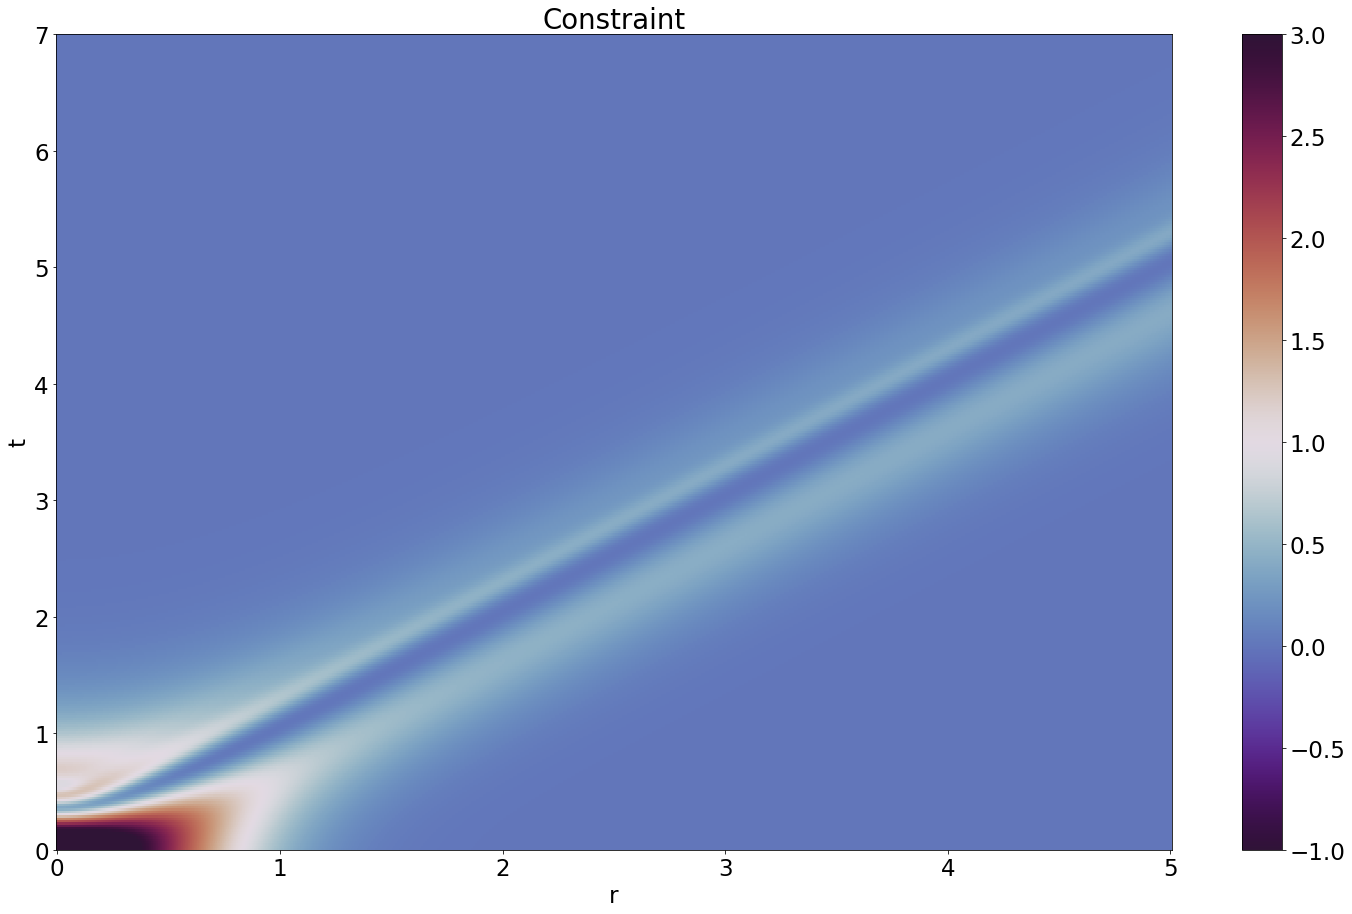

In [237]:
y = times[:-1]
x = big_DF[big_DF_ind][h_ind][0]['x']
plt.pcolormesh(x,y,constraint,vmin=-1,vmax=3,cmap='twilight_shifted')
plt.colorbar( orientation="vertical")
plt.ylim([0,7])
plt.xlabel('r')
plt.ylabel('t')
plt.title('Constraint')

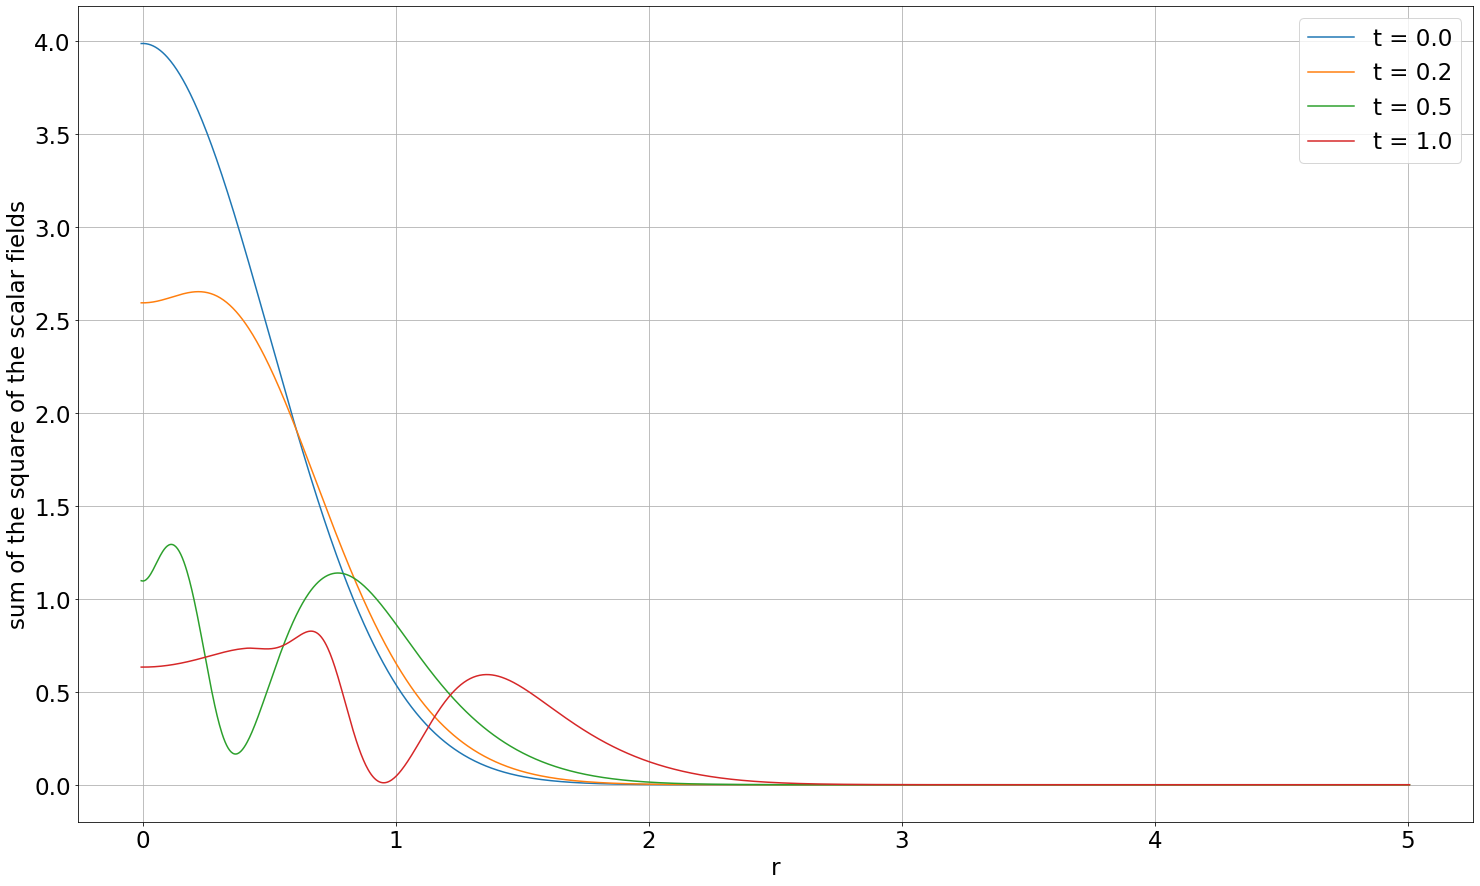

In [232]:
for t in [0,10,25,50]:
    plt.plot(big_DF[big_DF_ind][h_ind][0]['x'],constraint[t],label='t = '+str(times[t]))
plt.legend()
plt.xlabel('r')
plt.ylabel('sum of the square of the scalar fields')
plt.grid()